### **Week 2**

In [1]:
import numpy as np

In [2]:
!pip install IPython

## **Training** Data

In [3]:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)

y = w0+w1*X+np.random.rand(n,)

In [4]:
print(X.shape,y.shape)

(100,) (100,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80,) (80,) (20,) (20,)


In [7]:
X_train[:5]

array([7.06261569, 1.29247871, 5.49626977, 1.82387345, 5.81376557])

In [8]:
y_train[:5]

array([25.6890094 ,  8.49726286, 20.8717763 , 10.33970657, 21.99058169])

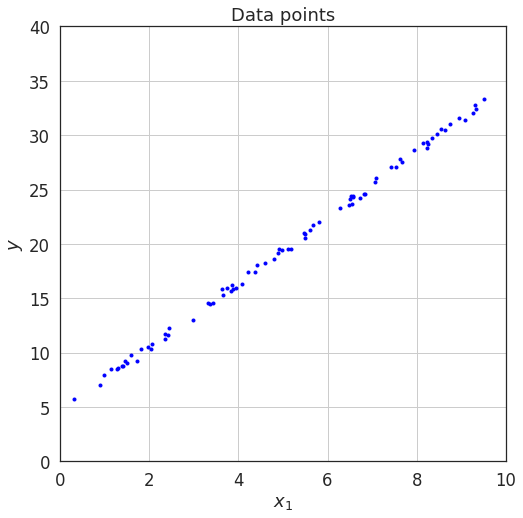

In [11]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18)
plt.axis([0,10,0,40])

plt.show()



In [16]:
def add_dummy(x):
  return np.column_stack((np.ones(x.shape[0]),x))  #input - tuple

In [17]:
np.column_stack?

Testing

In [18]:
import unittest

class TestDummy(unittest.TestCase):
  def test_dummy(self):
    train_matrix = np.array([[3,2,5],[9,4,7]])
    train_matrix_with_dummy = add_dummy(train_matrix)

    self.assertEqual(train_matrix_with_dummy.shape,(2,4))

    np.testing.assert_array_equal(train_matrix_with_dummy,np.array([[1,3,2,5],[1,9,4,7]]))

unittest.main(argv=[''], defaultTest = 'TestDummy', verbosity  = 2, exit = False)




test_dummy (__main__.TestDummy) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [20]:
add_dummy(np.array([[3,4],[9,7]]))

array([[1., 3., 4.],
       [1., 9., 7.]])

In [22]:
print("Before adding dummy",X_train[:5])
print("After adding dummy")

X_train_with_dummy = add_dummy(X_train)
print(X_train_with_dummy[:5])

Before adding dummy [7.06261569 1.29247871 5.49626977 1.82387345 5.81376557]
After adding dummy
[[1.         7.06261569]
 [1.         1.29247871]
 [1.         5.49626977]
 [1.         1.82387345]
 [1.         5.81376557]]


### **Model**

In [27]:
def predict(X,w):

  assert X.shape[-1]==w.shape[0]
  return X@w

In [31]:
import unittest
class TestPredict(unittest.TestCase):

  def test_predict(self):

    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    predicted_label_vec = predict(train_matrix,weight_vector)

    self.assertEqual(predicted_label_vec.shape, (2,))

    np.testing.assert_array_equal(predicted_label_vec, expected_label_vector)

unittest.main(argv = [''], defaultTest = "TestPredict", verbosity = 2, exit = False)

test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [47]:
def generate_data(n):
  w1 = 3
  w0 = 4

  X = 10 * np.random.rand(n,)

  y = w0+w1*X+np.random.rand(n,)

  return X,y

In [32]:


w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)

y = w0+w1*X+np.random.rand(n,)

In [33]:
X_dummy = add_dummy(X)

In [59]:
def preprocess(X,y):
  X_dummy = add_dummy(X)
  return  train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

In [37]:
w = np.random.rand(2,)
w

array([0.65435013, 0.64375369])

In [38]:
y_hat = predict(X_train, w)

In [39]:
y_hat[:10]

array([2.56315411, 4.48588147, 2.39205653, 6.13652391, 4.03951144,
       2.62379319, 4.60771219, 1.90651437, 4.35890465, 2.4578113 ])

In [40]:
y[:10]

array([14.31935092,  5.35119708, 32.47947322, 24.63321945, 18.15064198,
       15.7259142 , 25.86450539, 31.87070728,  8.19168614, 21.40410167])

Non-vectorized

In [41]:
def non_vec(X,w):

  y = []
  for i in range(0,X.shape[0]):
    y_hat_i = 0
    for j in range(0,X.shape[-1]):
      y_hat_i += X[i][j]*w[j]
    y.append(y_hat_i)
  return np.array(y)

In [42]:
import unittest

class TestPredictNonvec(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    expected_label_vector = np.array([11,21])

    predicted_label_vec = non_vec(train_matrix,weight_vector)

    self.assertEqual(predicted_label_vec.shape, (2,))

    np.testing.assert_array_equal(predicted_label_vec, expected_label_vector)

unittest.main(argv = [''], defaultTest = "TestPredict", verbosity = 2, exit = False)


test_predict (__main__.TestPredict) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


Vectorized vs Nonvectorized

In [43]:
import time 

start_time = time.time()
y_hat_vecorized = predict(X_train, w)
end_time = time.time()
print("Vector time: ", end_time - start_time)

start_time = time.time()
y_hat_vecorized = non_vec(X_train, w)
end_time = time.time()
print("Non-Vector time: ", end_time - start_time)

Vector time:  0.0002741813659667969
Non-Vector time:  0.0005080699920654297


In [49]:
X,y = generate_data(n = 1000000)
X_dummy = add_dummy(X)
X_train, X_test, y_train, y_test = train_test_split(X_dummy,y,test_size = 0.2, random_state = 42)

start_time = time.time()
y_hat_vecorized = predict(X_train, w)
end_time = time.time()
print("Vector time: ", end_time - start_time)

start_time = time.time()
y_hat_vecorized = non_vec(X_train, w)
end_time = time.time()
print("Non-Vector time: ", end_time - start_time)

Vector time:  0.0028085708618164062
Non-Vector time:  2.0685479640960693


## **Loss Function**

In [56]:
def loss (X,y,w):
  e = predict(X,w) - y
  # print(e)
  return 0.5*(np.transpose(e)@e)

In [58]:
import unittest

class TestLoss(unittest.TestCase):

  def test_predict_nonvec(self):
    train_matrix_0 = np.array([[3,2,5],[9,4,7]])
    train_matrix = add_dummy(train_matrix_0)
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11])
    expected_loss = np.array([62.5])

    loss_val = loss(train_matrix, label_vector, weight_vector)
    print(loss_val)

    self.assertEqual(loss_val.shape, ())

    np.testing.assert_array_equal(loss_val, expected_loss)

unittest.main(argv = [''], defaultTest = "TestLoss", verbosity = 2, exit = False)


test_predict_nonvec (__main__.TestLoss) ... 

[ 5. 10.]
62.5


ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


In [79]:
X,y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X,y)
w = np.random.rand(2,)

In [83]:
def visualize_loss_single_feature(X_train, y_train, w):
  sns.set_style("white")
  f = plt.figure(figsize = (8,8))
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

  print(X_train.shape, y_train[:5])
  plt.plot(X_train[:,-1],y_train,"b.")
  pred = predict(X_train,w)
  plt.plot(X_train[:,-1], pred ,"b.", color = 'green')
  plt.title("Loss-vis")
  plt.grid(True)
  plt.xlabel("$x_1$", fontsize = 18)
  plt.ylabel("$y$", fontsize = 18)
  plt.axis([0,10,0,40])

  plt.vlines(X_train[:,-1], pred, y_train, colors = 'r', linestyles = 'solid')

  plt.show()


(80, 2) [26.27143434 26.87827778  7.25783724 33.76766308 33.48443645]


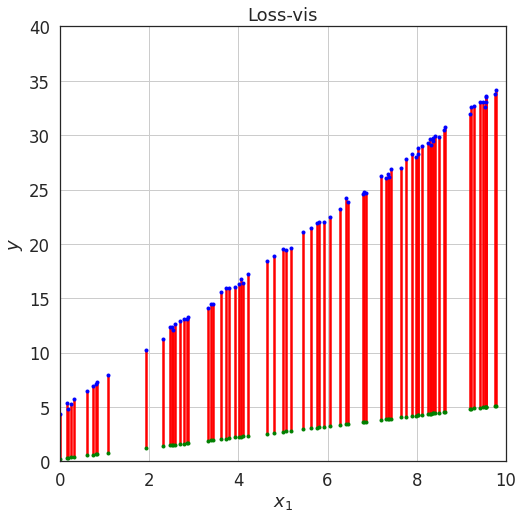

In [84]:
visualize_loss_single_feature(X_train,y_train,w)

(80, 2) [26.27143434 26.87827778  7.25783724 33.76766308 33.48443645]


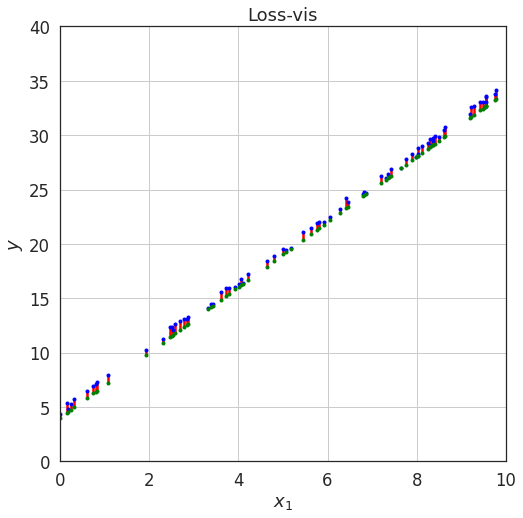

In [85]:
visualize_loss_single_feature(X_train,y_train,np.array([4,3]))